In [ ]:
import zipfile
z=zipfile.ZipFile('/content/drive/MyDrive/car-damage-dataset.zip')
z.extractall()
z.close()

## **visulisation of images from different directories**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

dir='car-damage-dataset/'
for i in range(1):
  dirt=[]
  ra=random.choice(['00-damage','01-whole'])
  ran=random.choice(['00-front','01-rear','02-side'])
  rand=random.choice(['01-minor','02-moderate','03-severe'])
  rando=random.choice(range(272))
  num=str(i+1)
  r=str(rando)
  #print(num)
  print(rando)
  if rando<10:
    dirt.append(dir+'data'+'1'+'a'+'/'+'training/'+ra+'/'+'000'+r+'.JPEG')
    dirt.append(dir+'data'+'2'+'a'+'/'+'training/'+ran+'/'+'000'+r+'.JPEG')
    dirt.append(dir+'data'+'3'+'a'+'/'+'training/'+rand+'/'+'000'+r+'.JPEG')
  elif rando>9 and rando <99:
    dirt.append(dir+'data'+'1'+'a'+'/'+'training/'+ra+'/'+'00'+r+'.JPEG')
    dirt.append(dir+'data'+'2'+'a'+'/'+'training/'+ran+'/'+'00'+r+'.JPEG')
    dirt.append(dir+'data'+'3'+'a'+'/'+'training/'+rand+'/'+'00'+r+'.JPEG')
  elif rando>99:
    dirt.append(dir+'data'+'1'+'a'+'/'+'training/'+ra+'/'+'0'+r+'.JPEG')
    dirt.append(dir+'data'+'2'+'a'+'/'+'training/'+ran+'/'+'0'+r+'.JPEG')
    dirt.append(dir+'data'+'3'+'a'+'/'+'training/'+rand+'/'+'0'+r+'.JPEG')

240


car-damage-dataset/data1a/training/00-damage/0240.JPEG


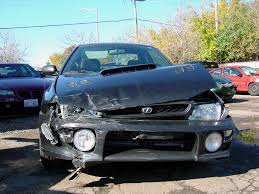

car-damage-dataset/data2a/training/01-rear/0240.JPEG


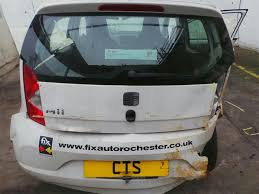

car-damage-dataset/data3a/training/03-severe/0240.JPEG


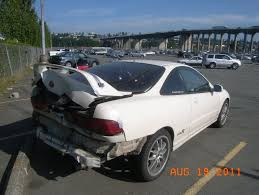

In [ ]:
from google.colab.patches import cv2_imshow
for i in dirt:
  print(i)
  img=cv2.imread(i)
  cv2_imshow(img)

## **importing basic libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1/255.)
valid=ImageDataGenerator(rescale=1/255.)

In [ ]:
train=train.flow_from_directory('car-damage-dataset/data1a/training',
                                shuffle=True,
                                class_mode='binary', target_size=(128, 128))
valid=valid.flow_from_directory('car-damage-dataset/data1a/validation',
                                shuffle=False,
                                class_mode='binary', target_size=(128, 128))

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


## **function for checking different metrics of our model created**

In [ ]:
def report(data,valid):
  from sklearn.metrics import classification_report
  import numpy as np
  import tensorflow as tf
  tmodel=tf.keras.models.load_model(data,compile=True)
  tmodel.evaluate(valid)
  valida=tmodel.predict(valid)
  valida=np.argmax(valida,axis=1)
  val=valid.labels
  val=val.reshape(-1,1)
  c=classification_report(valida,val)
  print(c)

##**checking if the car has been damage or not and for that we have used vgg16 and fine tuning has also been done**

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
modelo=VGG16(include_top=False,  classes=2, classifier_activation='sigmoid')
modelo.trainable=False
inputs=tf.keras.layers.Input(shape=(128,128,3))
x=modelo(inputs)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=Dense(1,activation='sigmoid')(x)
tmodel=tf.keras.Model(inputs,outputs)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
tmodel.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
history=tmodel.fit(train,epochs=10,
          steps_per_epoch=len(train),
          validation_data=valid,
          validation_steps=len(valid)
          )

Epoch 1/10
58/58 [==============================] - 28s 266ms/step - loss: 0.6736 - accuracy: 0.5891 - val_loss: 0.6136 - val_accuracy: 0.7413
Epoch 2/10
58/58 [==============================] - 12s 204ms/step - loss: 0.5948 - accuracy: 0.7391 - val_loss: 0.5491 - val_accuracy: 0.8152
Epoch 3/10
58/58 [==============================] - 12s 200ms/step - loss: 0.5481 - accuracy: 0.7734 - val_loss: 0.5070 - val_accuracy: 0.8217
Epoch 4/10
58/58 [==============================] - 12s 204ms/step - loss: 0.5171 - accuracy: 0.7793 - val_loss: 0.4782 - val_accuracy: 0.8283
Epoch 5/10
58/58 [==============================] - 12s 199ms/step - loss: 0.4955 - accuracy: 0.7918 - val_loss: 0.4558 - val_accuracy: 0.8283
Epoch 6/10
58/58 [==============================] - 12s 205ms/step - loss: 0.4789 - accuracy: 0.7973 - val_loss: 0.4407 - val_accuracy: 0.8304
Epoch 7/10
58/58 [==============================] - 12s 203ms/step - loss: 0.4680 - accuracy: 0.8000 - val_loss: 0.4282 - val_accuracy: 0.8348

In [ ]:
modelo.trainable = True

# Freeze all layers except for the
for layer in modelo.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
tmodel.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
initial_epochs=10
fepochs=initial_epochs+5
tmodel.fit(train,
            epochs=fepochs,
            initial_epoch=history.epoch[-1],
            steps_per_epoch=len(train),
            validation_data=valid,
            validation_steps=len(valid))

Epoch 10/15
58/58 [==============================] - 15s 234ms/step - loss: 0.4765 - accuracy: 0.7690 - val_loss: 0.2972 - val_accuracy: 0.8891
Epoch 11/15
58/58 [==============================] - 13s 230ms/step - loss: 0.3091 - accuracy: 0.8658 - val_loss: 0.2679 - val_accuracy: 0.8739
Epoch 12/15
58/58 [==============================] - 13s 232ms/step - loss: 0.2187 - accuracy: 0.9120 - val_loss: 0.2642 - val_accuracy: 0.8804
Epoch 13/15
58/58 [==============================] - 13s 232ms/step - loss: 0.1402 - accuracy: 0.9462 - val_loss: 0.2618 - val_accuracy: 0.8957
Epoch 14/15
58/58 [==============================] - 13s 232ms/step - loss: 0.0948 - accuracy: 0.9658 - val_loss: 0.3321 - val_accuracy: 0.8870
Epoch 15/15
58/58 [==============================] - 13s 230ms/step - loss: 0.0666 - accuracy: 0.9772 - val_loss: 0.3844 - val_accuracy: 0.8826


In [ ]:
tmodel.save('data1a.h5')

In [ ]:
import cv2
img=cv2.imread('/content/th (19).jpg')
img=cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
img=img/255.
img=tf.expand_dims(img,axis=0)

tf.round(tmodel.predict(img))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
tmodel.save('data1a.h5')

##**checking location of the damage and for that we have created yet another model with vgg16**

In [ ]:
train1=ImageDataGenerator(rescale=1/255.)
valid1=ImageDataGenerator(rescale=1/255.)

In [ ]:
train1=train1.flow_from_directory('car-damage-dataset/data2a/training',
                                 shuffle=True,batch_size=16,
                                  
                                class_mode='categorical', target_size=(128, 128))
valid1=valid1.flow_from_directory('car-damage-dataset/data2a/validation',
                                  shuffle=False,batch_size=16,
                                class_mode='categorical', target_size=(128, 128))

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [ ]:
modelo=VGG16(include_top=False,  classes=3, classifier_activation='softmax')
modelo.trainable=False
inputs=tf.keras.layers.Input(shape=(128,128,3))
x=modelo(inputs)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
#x=Dense(512,activation='relu')(x)
#x=Dense(256,activation='relu')(x)
#x=Dense(128,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x)
tmodel=tf.keras.Model(inputs,outputs)

In [ ]:
tmodel.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics='accuracy')
history=tmodel.fit(train1,epochs=10,
          steps_per_epoch=len(train1),
          validation_data=valid1,
          validation_steps=len(valid1)
          )

Epoch 1/10
62/62 [==============================] - 5s 65ms/step - loss: 1.0471 - accuracy: 0.4617 - val_loss: 1.0171 - val_accuracy: 0.5029
Epoch 2/10
62/62 [==============================] - 4s 58ms/step - loss: 0.9764 - accuracy: 0.5567 - val_loss: 0.9657 - val_accuracy: 0.5848
Epoch 3/10
62/62 [==============================] - 4s 59ms/step - loss: 0.9357 - accuracy: 0.5771 - val_loss: 0.9295 - val_accuracy: 0.6199
Epoch 4/10
62/62 [==============================] - 4s 60ms/step - loss: 0.8970 - accuracy: 0.6221 - val_loss: 0.9047 - val_accuracy: 0.6199
Epoch 5/10
62/62 [==============================] - 4s 60ms/step - loss: 0.8702 - accuracy: 0.6384 - val_loss: 0.8955 - val_accuracy: 0.6374
Epoch 6/10
62/62 [==============================] - 4s 60ms/step - loss: 0.8524 - accuracy: 0.6261 - val_loss: 0.8718 - val_accuracy: 0.6023
Epoch 7/10
62/62 [==============================] - 4s 60ms/step - loss: 0.8348 - accuracy: 0.6415 - val_loss: 0.8590 - val_accuracy: 0.6199
Epoch 8/10
62

In [ ]:
modelo.trainable = True

# Freeze all layers except for the
for layer in modelo.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
tmodel.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
initial_epochs=10
fepochs=initial_epochs+5
history1=tmodel.fit(train1,
            epochs=fepochs,
            initial_epoch=history.epoch[-1],
            steps_per_epoch=len(train1),
            validation_data=valid1,
            validation_steps=len(valid1))

Epoch 10/15
62/62 [==============================] - 8s 108ms/step - loss: 0.9966 - accuracy: 0.5291 - val_loss: 0.8539 - val_accuracy: 0.5789
Epoch 11/15
62/62 [==============================] - 6s 101ms/step - loss: 0.7663 - accuracy: 0.6527 - val_loss: 0.8239 - val_accuracy: 0.6608
Epoch 12/15
62/62 [==============================] - 6s 101ms/step - loss: 0.5693 - accuracy: 0.7722 - val_loss: 0.8075 - val_accuracy: 0.7135
Epoch 13/15
62/62 [==============================] - 6s 102ms/step - loss: 0.4283 - accuracy: 0.8304 - val_loss: 0.6724 - val_accuracy: 0.7778
Epoch 14/15
62/62 [==============================] - 6s 101ms/step - loss: 0.3076 - accuracy: 0.8836 - val_loss: 0.8403 - val_accuracy: 0.6842
Epoch 15/15
62/62 [==============================] - 6s 101ms/step - loss: 0.1726 - accuracy: 0.9387 - val_loss: 0.7446 - val_accuracy: 0.7719


In [ ]:
import cv2
img=cv2.imread('/content/car-damage-dataset/data2a/validation/02-side/0008.JPEG')
img=cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
img=img/255.
img=tf.expand_dims(img,axis=0)

c=tmodel.predict(img)
c

array([[0.08233907, 0.01764072, 0.90002024]], dtype=float32)

In [ ]:
c.argmax()

2

In [ ]:
tmodel.save('data2a.h5')

##**checking severity of the damage and for that we have created yet another model with vgg16**

In [ ]:
from tensorflow.keras.applications import VGG16
train2=ImageDataGenerator(rescale=1/255.)
valid2=ImageDataGenerator(rescale=1/255.)

train2=train2.flow_from_directory('car-damage-dataset/data3a/training',
                                shuffle=True,
                                class_mode='categorical', target_size=(128, 128))
valid2=valid2.flow_from_directory('car-damage-dataset/data3a/validation',
                                  shuffle=False,
                                class_mode='categorical', target_size=(128, 128))

modelo=VGG16(include_top=False,  classes=3, classifier_activation='softmax')
modelo.trainable=False
inputs=tf.keras.layers.Input(shape=(128,128,3))
x=modelo(inputs)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=Dense(3,activation='softmax')(x)
tmodel=tf.keras.Model(inputs,outputs)


tmodel.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics='accuracy')
history=tmodel.fit(train2,epochs=10,
          steps_per_epoch=len(train2),
          validation_data=valid2,
          validation_steps=len(valid2)
          )



modelo.trainable = True

# Freeze all layers except for the
for layer in modelo.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
tmodel.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.00001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])


initial_epochs=10
fepochs=initial_epochs+5
history1=tmodel.fit(train2,
            epochs=fepochs,
            initial_epoch=history.epoch[-1],
            steps_per_epoch=len(train2),
            validation_data=valid2,
            validation_steps=len(valid2))

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.
Epoch 1/10
31/31 [==============================] - 4s 112ms/step - loss: 1.0781 - accuracy: 0.4321 - val_loss: 1.0339 - val_accuracy: 0.5088
Epoch 2/10
31/31 [==============================] - 3s 96ms/step - loss: 0.9715 - accuracy: 0.5455 - val_loss: 0.9693 - val_accuracy: 0.5380
Epoch 3/10
31/31 [==============================] - 3s 98ms/step - loss: 0.9134 - accuracy: 0.6088 - val_loss: 0.9411 - val_accuracy: 0.5497
Epoch 4/10
31/31 [==============================] - 3s 99ms/step - loss: 0.8708 - accuracy: 0.6231 - val_loss: 0.9051 - val_accuracy: 0.5906
Epoch 5/10
31/31 [==============================] - 3s 97ms/step - loss: 0.8448 - accuracy: 0.6384 - val_loss: 0.8860 - val_accuracy: 0.5906
Epoch 6/10
31/31 [==============================] - 3s 98ms/step - loss: 0.8263 - accuracy: 0.6547 - val_loss: 0.8754 - val_accuracy: 0.5789
Epoch 7/10
31/31 [==============================] - 3s 97ms/step - loss

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 10/15
31/31 [==============================] - 6s 174ms/step - loss: 0.7754 - accuracy: 0.6558 - val_loss: 0.8042 - val_accuracy: 0.6199
Epoch 11/15
31/31 [==============================] - 5s 160ms/step - loss: 0.6381 - accuracy: 0.7365 - val_loss: 0.7822 - val_accuracy: 0.6199
Epoch 12/15
31/31 [==============================] - 5s 160ms/step - loss: 0.5328 - accuracy: 0.7896 - val_loss: 0.7683 - val_accuracy: 0.6316
Epoch 13/15
31/31 [==============================] - 5s 159ms/step - loss: 0.4349 - accuracy: 0.8315 - val_loss: 0.8587 - val_accuracy: 0.6082
Epoch 14/15
31/31 [==============================] - 5s 159ms/step - loss: 0.3573 - accuracy: 0.8754 - val_loss: 0.7898 - val_accuracy: 0.6433
Epoch 15/15
31/31 [==============================] - 5s 160ms/step - loss: 0.2643 - accuracy: 0.9234 - val_loss: 0.8108 - val_accuracy: 0.6959


In [ ]:
report('data3a.h5',valid2)

6/6 [==============================] - 1s 86ms/step - loss: 0.8108 - accuracy: 0.6959
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        38
           1       0.60      0.56      0.58        59
           2       0.82      0.76      0.79        74

    accuracy                           0.70       171
   macro avg       0.68      0.70      0.69       171
weighted avg       0.70      0.70      0.70       171



In [ ]:
img=cv2.imread('/content/th (16).jpg')
img=cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
img=img/255.
img=tf.expand_dims(img,axis=0)

c=tmodel.predict(img)
c

array([[0.00754765, 0.92443764, 0.06801473]], dtype=float32)

In [ ]:
c.argmax()

1

In [ ]:
tmodel.save('data3a.h5')